In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import pandas as pd

In [2]:
dataset = pd.read_csv('data/PolynomialRegressionData.csv')
dataset.head()

,hour,score
0,0.2,2
1,0.5,4
2,0.8,6
3,0.9,4
4,1.2,6


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
reg.score(X,y)

0.8169296513411765

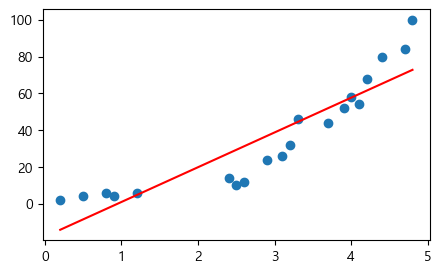

In [6]:
plt.figure(figsize=(5,3))
plt.scatter(X, y, label='실제점수')
plt.plot(X, reg.predict(X), label='예측점수', color='r')
plt.show()

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)
X_poly[:5], X[:5]

(array([[1.  , 0.2 , 0.04],
        [1.  , 0.5 , 0.25],
        [1.  , 0.8 , 0.64],
        [1.  , 0.9 , 0.81],
        [1.  , 1.2 , 1.44]]),
 array([[0.2],
        [0.5],
        [0.8],
        [0.9],
        [1.2]]))

In [8]:
poly.get_feature_names_out()

array(['1', 'x0', 'x0^2'], dtype=object)

In [9]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


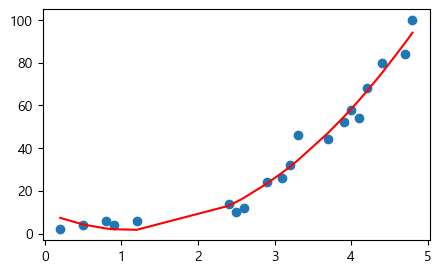

In [10]:
plt.figure(figsize=(5,3))
plt.scatter(X, y, label='실제점수')
plt.plot(X, poly_reg.predict(X_poly), label='예측점수', color='r')
plt.show()

In [11]:
import numpy as np
X_range = np.arange(np.min(X), np.max(X), 0.1)
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [12]:
X.shape, X_range.shape

((20, 1), (46,))

In [13]:
X_range = X_range.reshape(len(X_range), 1)
X_range.shape

(46, 1)

In [14]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_range)
X_poly[:5]

array([[1.  , 0.2 , 0.04],
       [1.  , 0.3 , 0.09],
       [1.  , 0.4 , 0.16],
       [1.  , 0.5 , 0.25],
       [1.  , 0.6 , 0.36]])

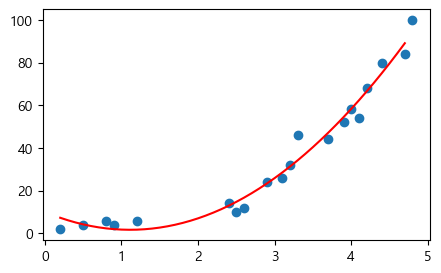

In [15]:
plt.figure(figsize=(5,3))
plt.scatter(X, y, label='실제점수')
plt.plot(X_range, poly_reg.predict(X_poly), label='예측점수', color='r')

In [16]:
poly_reg.score(poly.fit_transform(X), y)

0.9755457185555199

In [17]:
def model_poly(degree):
    import pandas as pd
    dataset = pd.read_csv('data/PolynomialRegressionData.csv')

    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values
    
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    X_poly=poly.fit_transform(X)
    
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    return poly_reg
    

In [18]:
model = model_poly(2)

In [19]:
# #4시간 공부했을 때 점수:

# x = poly.transform([[4]])  # fit_transform이 아닌 transform 사용
# model.predict(x)


In [20]:
reg.predict([[5]])

array([76.56559375])

In [21]:
def graph(degree):
    model = model_poly(degree)
    
    X_range = np.arange(np.min(X), np.max(X), 0.1)
    X_range = X_range.reshape(len(X_range), 1)
    
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    X_poly=poly.fit_transform(X_range)

    plt.figure(figsize=(5,3))
    plt.scatter(X, y, label='실제점수')
    plt.plot(X_range, model.predict(X_poly), label='예측점수', color='g')
    plt.show()

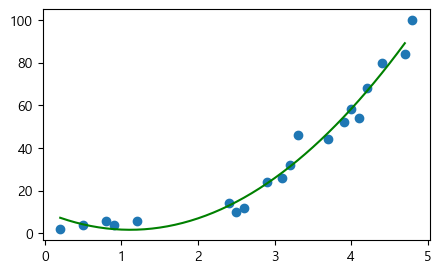

In [22]:
graph(2)

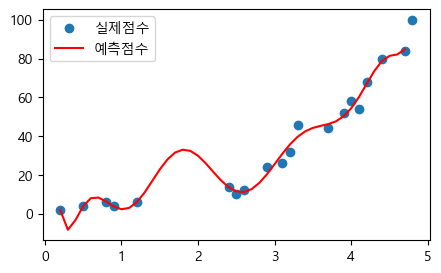

In [23]:
def graph(degree):
    # 모델 생성
    model = model_poly(degree)

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import PolynomialFeatures

    # X_range 생성
    X_range = np.arange(np.min(X), np.max(X), 0.1).reshape(-1, 1)

    # 다항 특성 변환
    poly = PolynomialFeatures(degree=degree)
    X_range_poly = poly.fit_transform(X_range)

    # 원래 X도 변환해서 모델 학습에 사용
    X_poly = poly.fit_transform(X)

    # 모델 학습
    model.fit(X_poly, y)

    # 시각화
    plt.figure(figsize=(5, 3))
    plt.scatter(X, y, label='실제점수')
    plt.plot(X_range, model.predict(X_range_poly), label='예측점수', color='r')
    plt.legend()
    plt.show()

# 예시 실행
graph(10)


In [24]:
def predict(hour):
    model = model_poly(2)

    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=2)
    poly_hour=poly.fit_transform([[hour]])

    pred = model.predict(poly_hour)
    print(f'다항회귀: {hour}시간 공부했을 경우 점수는{pred[0]:.2f}입니다')

    reg = LinearRegression()
    reg.fit(X, y)
    pred = reg.predict([[hour]])
    print(f'선형회귀: {hour}시간 공부했을 경우 점수는{pred[0]:.2f}입니다')

In [25]:
predict(4.5)

다항회귀: 4.5시간 공부했을 경우 점수는79.57입니다
선형회귀: 4.5시간 공부했을 경우 점수는67.11입니다


In [26]:
reg.score(X, y), poly_reg.score(poly.transform(X), y)

(0.8169296513411765, 0.9755457185555199)

In [38]:
df = pd.read_csv('data/다항회귀.csv')
X = df.iloc[:, 1:].values
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  5.  , 25.  ],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  1.8 ,  3.24],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  2.8 ,  7.84]])

In [40]:
model = model_poly(2)
y_pred= model.predict(X_poly)
y_pred

array([  7.05092142, 104.2391999 ,  40.38980529,   4.9109755 ,
        58.28288008,  21.03479593])

In [43]:
df['예측점수'] = y_pred
df.rename(columns={'name':'이름', 'hour':'공부시간'}, inplace=True)
df['예측점수']=df['예측점수'].apply(lambda x: round(x,2))
df

,이름,공부시간,예측점수
0,홍길동,2.0,7.05
1,강감찬,5.0,104.24
2,이순신,3.5,40.39
3,이몽룡,1.8,4.91
4,성춘향,4.0,58.28
5,송중기,2.8,21.03
